# Task 3: Model Evaluation Metrics (10 points)

After the challenging exercise on model deployment, let us take things easy and do some simple metric visualizations.

I assume that your other ML/DS courses have exposed you to the various metrics. In this task, we will explore two recent ideas in scikit-learn.

1. Plotting summary metrics such as ROC and PRC using the refreshed APIs
2. Implementing custom metrics. 

You need exactly one line of code for the plotting and 2-3 lines of code for the custom metric.

## Task 3.1 : Plotting Summary Metrics (5 points)

We will use the modern API for visualizing four different metrics. You can find the references below. 

1. Confusion Matrix : see [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
2. ROC : see [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html)
3. PRC: see [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html)

In [1]:
from ds5612_pa2.code import pipeline_configs
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [2]:
ml_pipeline = pipeline_configs.get_simple_ml_pipeline()
ml_pipeline.train()
classifier = ml_pipeline.classifier
test_X, test_y = ml_pipeline.dataset.test_X, ml_pipeline.dataset.test_y
assert classifier is not None

### Task 3.1a: Plot Confusion Matrix

Use the ConfusionMatrixDisplay to plot the confusion matrix. Use the modern API of `from_estimator`. All the relevant variables have been created for your convenience in the previous code cell. Your result should look something like this.

![Confusion Matrix](resources/confusion_matrix.png) 

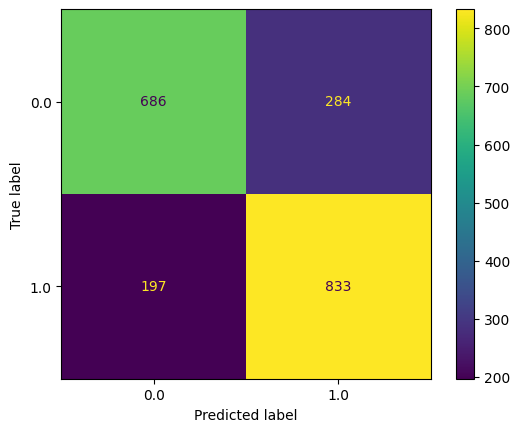

In [3]:
#Enter your code here.
ConfusionMatrixDisplay.from_estimator(classifier, test_X, test_y)

### Task 3.1b: Plot ROC Curve

Use the RocCurveDisplay to plot the ROC. Use the modern API of `from_estimator`. All the relevant variables have been created for your convenience in the previous code cell. Your result should look something like this.

![ROC Curve](resources/roc_curve.png) 

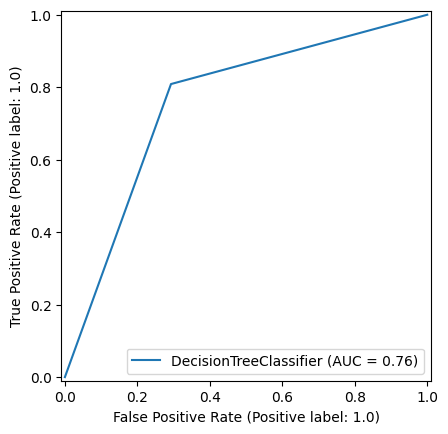

In [4]:
RocCurveDisplay.from_estimator(classifier, test_X, test_y)

### Task 3.1c: Plot Precision Recall Curve

Use the PrecisionRecallDisplay to plot the PRC. Use the modern API of `from_estimator`. All the relevant variables have been created for your convenience in the previous code cell. Your result should look something like this.

![Precision Recall Curve](resources/prc_curve.png) 

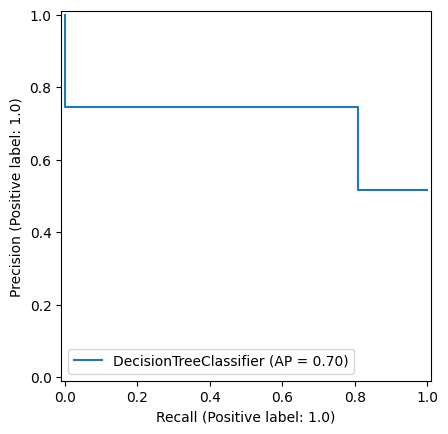

In [5]:
PrecisionRecallDisplay.from_estimator(classifier, test_X, test_y)

## Task 3.2: Custom Metrics (5 points)

scikit-learn provides a large number of metrics. A full list can be seen [here](https://scikit-learn.org/stable/modules/model_evaluation.html). However, in a business setting, you might need custom scoring function to evaluate a classifier.

Suppose you are designing a classifier to detect cancer. As we discussed in the class, accuracy (or even f-score for that matter) is insufficient as the cost of diagnosing malignant cancer as benign is much much higher than diagnosing benign as malignant. 

Another common scenario is when you want to preferentially have higher accuracy for some sub-populations. Suppose you want to make some predictions about your customer. You want your model to be more accurate for high-rollers (those who spend lot of money) than those who do not spend much. 

In this task, you will learn how to make a simple custom scorer. Once you know how to design a scorer, you can use it in all parts of ML pipeline in scikit-learn. For example, you can use it to evaluate classifiers, rank classifiers during hyper parameter tuning based on your metric etc. I will leave those as an exercise for the interested student :)

### Cost Matrix based Scorer

In this task, you will design a simple scorer that computes the cost score. In other words, you are given different weights to true positive, false positive, false negative and true negative. You will use these weights to compute a cost score. You want a classifier that minimizes the cost score. 

The details for writing a custom scorer can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html). 

Despite the long wall of text below, the code should take only 2-3 lines. There are three subtle issues to be aware of.

1. **Customizing scorers with kwargs:** By default, your scorer function will accept two mandatory inputs: true y and predicted y. So you have to figure out how to pass the cost matrix without hard coding the cost for correct and incorrect predictions. So read the manual about how to pass additional parameters to the function. Hint: It is not hard. You have to use the kwargs field.

2. **Designing cost based scorers:** By convention, scikit-learn assumes that higher values are better. However, this is not true for cost based scorers. So you need to have a way to fix this. A simple way is to return the negation of the cost. A more reliable method is to tell scikit-learn that higher is worse. We will follow the latter. Please check how to hint to scikit-learn about this.

3. **Ordering of Positive and Negative classes:** Most slides on confusion matrix (including mine) shows the top-left corner of the confusion matrix as true positive. However, scikit-learn follows a different convention where the item with label 0 is considered as positive class and label 1 is considered as negative class. So the cost matrix will be inverted. However, that is a box we do not want to open. You can assume that the scorer will be called with 4 values that is applied to entries [0, 0], [0, 1], [1, 0] and [1, 1] of the confusion matrix.


**Hint:** Do not write a loop over true y and predicted y. Note that you can compute the cost from the confusion matrix. So please get the confusion matrix first and then using the kwargs multiply the cost matrix.

**Implementation Details:** 

1. Please write your code in the function `cost_function` of `code/custom_metrics.py` To prevent hard coding, we will use the metaprogramming capabilities of Python. In other words, you will write a function that returns another function. If you are a nerd, please check up the concept of `closures` in Python. 

2. Please write the code that converts your function into a loss function (where higher values are worse) in ``.

**Testing:** 
You can test the code using the command 

> rye test -- -m t3_custom_metrics
